# TS3

## Modulos

In [32]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
fs = 1000
def mi_funcion_sen(vmax = 1, dc = 0, ff = 1, ph = 0, nn = N, fs = fs):
    t = nn/fs
    tt = np.arange(0,t,1/fs)
    xx = vmax*np.sin(2*np.pi*ff*tt + ph) + dc

    return tt, xx

def cuantizar(Sr, Vf, B):
    q = Vf/(2**(B-1))
    Srq = (Sr*1/q)
    Sq = np.round(Srq)*q
    
    return Sq, q

## Calculos

In [59]:
#analisis matematico
df = fs/N
ts = 1/fs
f0 = fs/N
Vf = 2
bins = 10


ff = np.arange(0,N,df)
bfrec = ff <= fs/2

def graficar(B):
    tt, Sr = mi_funcion_sen(ff=f0)
    Sq, q = cuantizar(Sr, Vf, B)
    e = Sq - Sr #error de cuantizacion 
    
    
    #Muestra de resultados
    print(f"paso de cuantizacion q: {q}")
    print(f"media de error {np.mean(e)}")
    print(f"media de varianza teorica: {q**2/12}")
    print(f"media de varianza real: {np.var(e)}")
    print(f"Correlacion: {np.corrcoef(Sr, e)[0, 1]}")
    
    # graficas 
    plt.figure(figsize=(12,4))
    #grafico de señal
    plt.subplot(1,2,1)
    plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V y q = {:3.5f} V'.format(B, Vf, q))
    plt.plot(tt, Sr, label='cuantiza')
    plt.plot(tt, Sq, label='normal')
    plt.legend()
    
    #distribucion uniforme
    plt.subplot(1,2,2)
    plt.title('histograma')
    plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
    plt.hist(e)
    
    plt.tight_layout()
    
    
    plt.figure(figsize=(12,4))
    # grafico de dispercion
    plt.subplot(1,2,1)
    plt.scatter(Sr, e, alpha=0.2)
    plt.xlabel("Señal Original")
    plt.ylabel("Error de Cuantización")
    plt.title("Gráfico de Dispersión: Señal vs. Error")
    plt.grid(True)
    
    #fft del error
    plt.subplot(1,2,2)
    plt.title("fft del error de cuantizacion")
    plt.plot(ff[bfrec], np.abs(np.fft.fft(e))[bfrec])
    
    plt.tight_layout()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Visualizacion + detalles

### Analisis B = 4 bits

Como la resolucion del cuantizador es de 4 bits, se espera que la cuantizacion no tenga un buena resolucion, haciendo los calculos se espera un paso de cuantizacion de q=0.25V, es decir que tiene muy pocos niveles lo que conlleva al escalonamiento que se observara en los graficos

pas de cuantizacion q: 0.25
media de error 4.440892098500626e-18
media de varianza teorica: 0.005208333333333333
media de varianza real: 0.004593875148040576
Correlacion: 0.13986165659678607


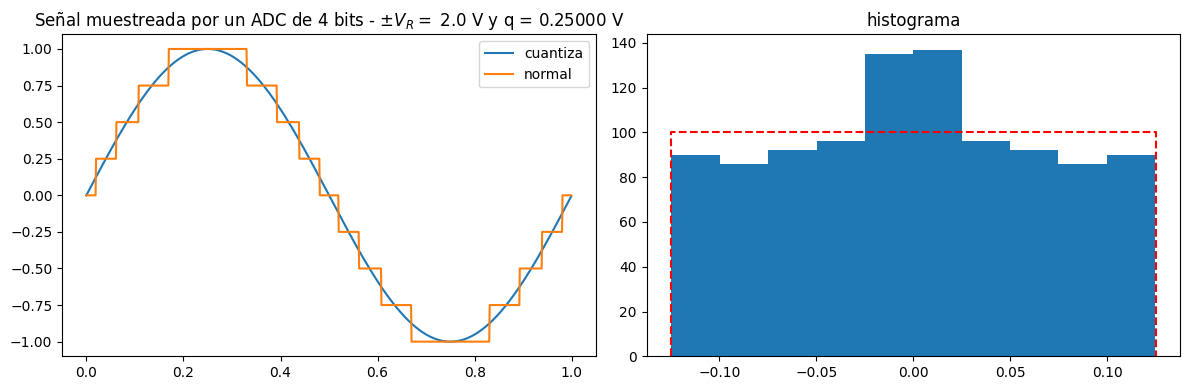

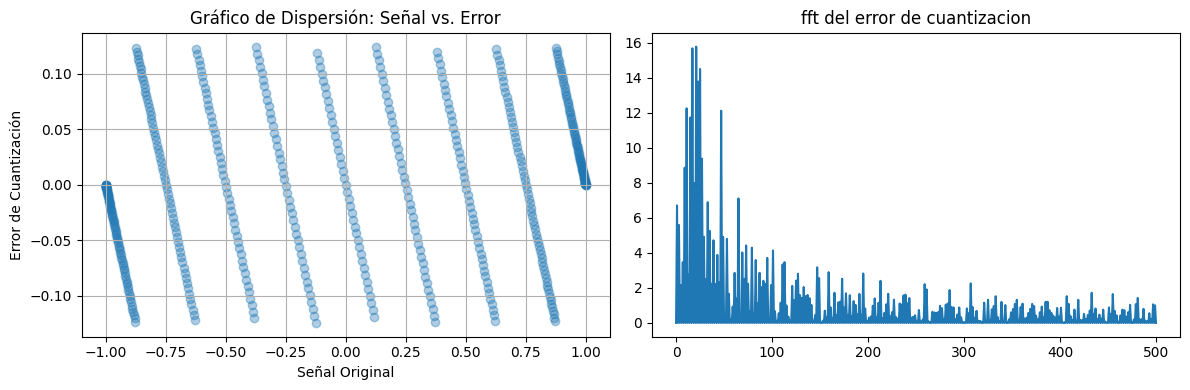

In [60]:
graficar(4)

### Analisis B = 8 bits

Para la resolucion de 8 bits, se espera una mejor resolucion con niveles que pueden tener 256 valores distintos, es decir un paso de cuantizacion mas pequeño, lo que lleva a que la grafica cuantizada no se vera tanto como un escalon y tendra una buena resolucion

pas de cuantizacion q: 0.015625
media de error 5.037636974236648e-18
media de varianza teorica: 2.0345052083333332e-05
media de varianza real: 1.9618708185307062e-05
Correlacion: 0.0345961349000662


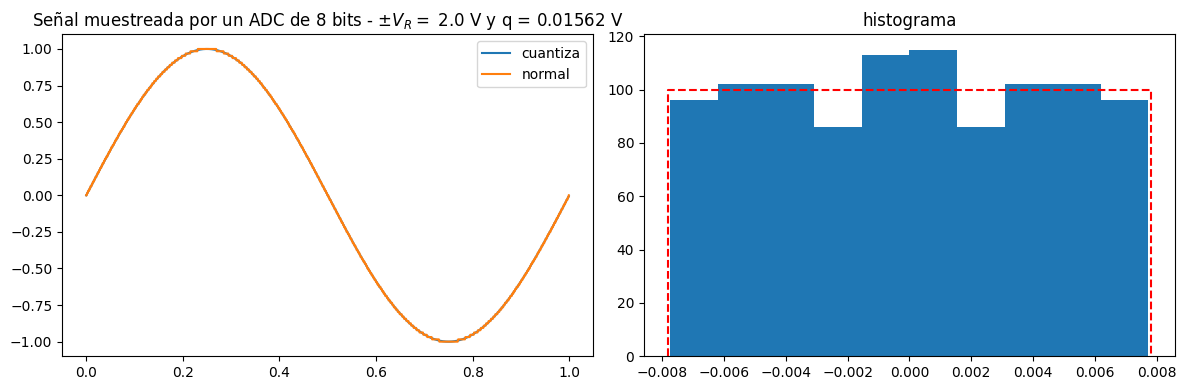

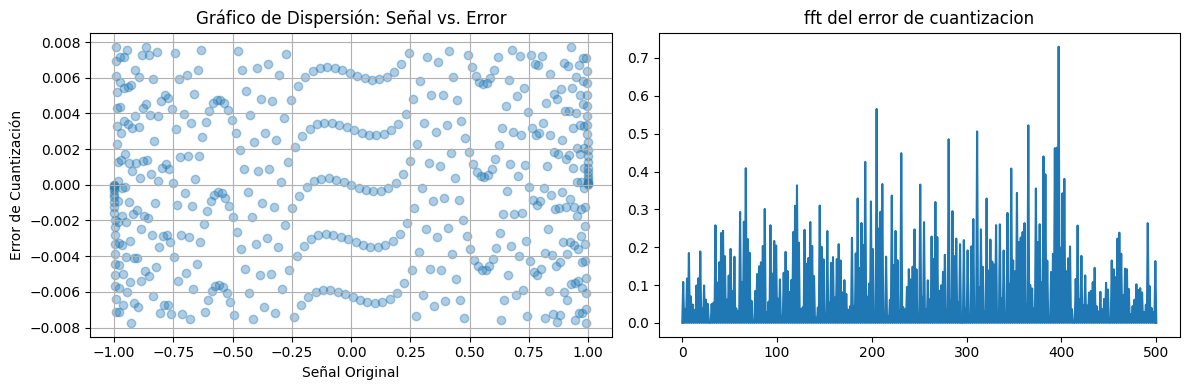

In [61]:
graficar(8)

### Analisis B = 16 bits

En este caso para 16 bits de resolucion, practicamente la grafica en la que se grafica la señal original y la cuantizada son practicamente iguales ya que tiene una gran resolucion.

pas de cuantizacion q: 6.103515625e-05
media de error 5.0340048969588216e-18
media de varianza teorica: 3.104408582051595e-10
media de varianza real: 3.098689930137293e-10
Correlacion: -0.010640084734015526


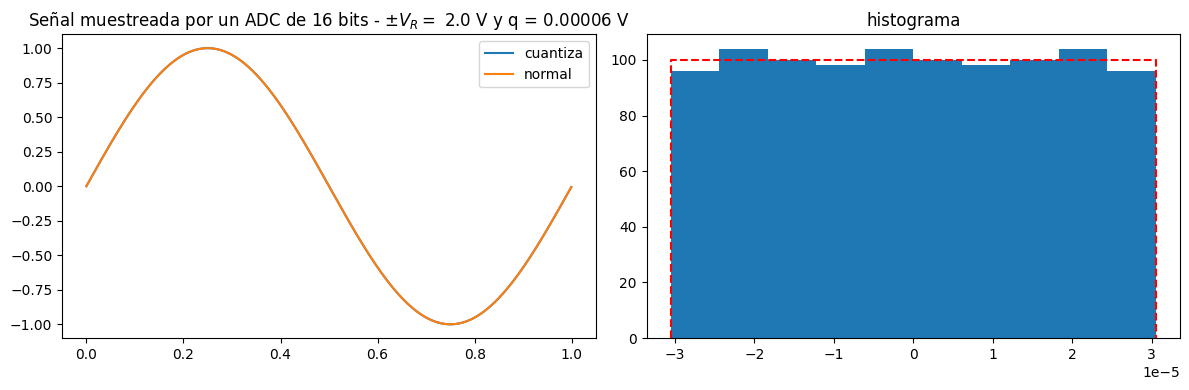

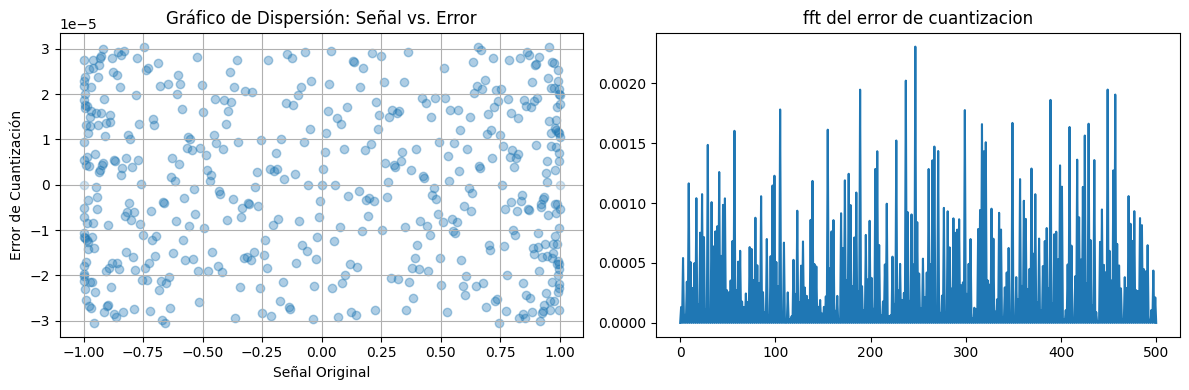

In [62]:
graficar(16)

## Analisis
Viendo los graficos de las distintas resoluciones podemos ver disntintos casos:

 1) La señal original vs la cuantizada

    Podemos observar que a medida que se aumenta la resolucion de los bits el escalonado que se observa en la señal cuantizada va deseparecicendo, lo cual es esperable ya que el paso de cuantizacion depende de los bits por lo que si vieramos cuantos valores posibles podrias tener, seria de $2^{B}$ lo cual nos indica que a medida que va subiendo la cantidad de bits el paso de cuantificacion va disminuyendo mucho mas.

    
 3) El histograma

    En el histograma a una resolucion de 4 bits se observa una mayor distribucion en las frecuencias bajas, es decir que tiene valores preferidos en el error lo que nos podria indicar de que tiene una correlacion con la señal original, la cual se analiza en el grafico de dispersion.


    A medida que se va aumentando la resolucion de los bits se observa que el histograma tiende a tener volverse uniforme, se puede ver claramente como en la resolucion de 16 bits el histograma del error es practicamanete uniforme, lo cual ahora si nos puede indicar de que se comporta como un ruido blanco sin ninguna correlacion con nuestra señal original.


    Tambien aclarando que el ancho del histograma es igual al paso de cuantificacion en cada uno de los graficos, lo cual nos da una indicacion de que el grafico esta correcto.

    
 5) El grafico de dispersion

    
    En este caso podemos notar que para una resolucion de 4 bits practicamente parecieria que el error y la señal estan correlacionados, bueno pero no es asi, ya que solo se ve en algunos puntos es decir que la señal no esta distribuida uniformente, pero a medida que se aumenta la resolucion el grafico de correlacion se va haciendo mas aleatorio, especificamente viendo el grafico del grafico de dispersion con una resolucion de 16 bits, es practicamente incorrelacionada, es decir que esto esta lo mas bien posible.

    
 7) Distribucion de energia del error

    
    En esta ocacion simplemente se puede decir que es una forma mas de ver el histograma, ya que podemos ver tambien que en la resolucion de 4 bits la energia se ve mas concentrada en las frecuencias mas pequeñas pero a medida que vamos aumentando la resolucion la distribucion de energia del error se va haciendo mas uniforme lo cual se ve perfectamente en la resolucion de 16 bits

## Conclusión

Los resultados muestran que elegir el número de bits en la cuantización realmente afecta la calidad de la señal digitalizada. Con más bits: Se reduce el error de cuantización. La señal cuantizada se parece más a la original. El error se comporta más como ruido blanco, lo que disminuye la correlación no deseada. Se minimiza la distorsión espectral y la introducción de armónicos en la señal.

Para futuras mejoras, podriamos implementar técnicas como el dithering, que ayuda a romper patrones en el error de cuantización y a aumentar su aleatoriedad. 